### Вариант 1

In [903]:
import numpy as np
import matplotlib.pyplot as plt

In [904]:
data = np.load('../9_12/var1_s1_0x1_s2_5_v_2.npy')

In [905]:
time = data[0]
u2 = data[1] #это u_2
dt = np.diff(time)[0]
velocity = 2

x1 = np.zeros_like(u2)
sigma1 = 0.1
sigma2 = 5
noise = np.random.normal(0, sigma1, len(x1))
for i in range(1, len(x1)):
    x1[i] = x1[i - 1] + velocity * dt

In [906]:
#Оценка
P1 = sigma1 ** 2
P2 = P1 * (sigma2**2) / (P1 + sigma2**2)

In [907]:
x2 = x1 + P2 / (sigma2**2) * (u2 - x1)

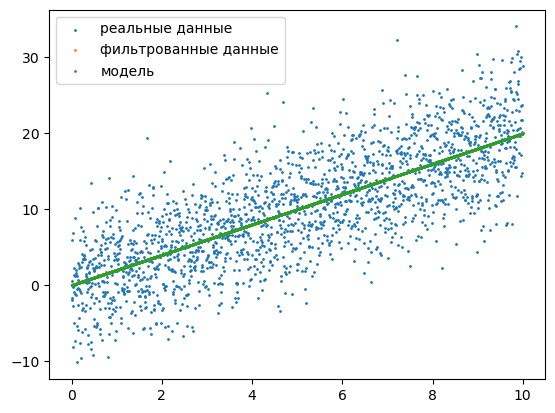

In [908]:
plt.scatter(time, u2, s = 1, label='реальные данные')
plt.scatter(time, x2, s = 1, label='фильтрованные данные')
plt.scatter(time, x1, s=1, label = 'модель')
plt.legend()

### ввести выбросы

In [909]:
def positive_or_negative():
    if np.random.random() < 0.5:
        return 1
    else:
        return -1

In [910]:
p = 0.05
anormal = np.array([np.random.random() * 1000 * positive_or_negative() if np.random.random() < p else 0. for _ in range(len(u2))])

In [911]:
anormalU2 = u2 + anormal

In [912]:
newX2 = x1 + P2 / (sigma2**2) * (anormalU2 - x1)

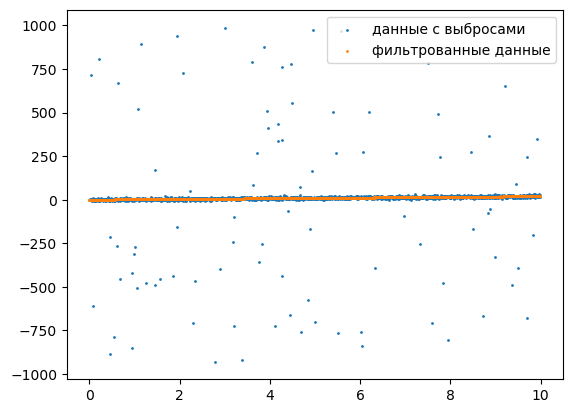

In [913]:
plt.scatter(time, anormalU2, s = 1, label='данные с выбросами')
plt.scatter(time, newX2, s = 1, label='фильтрованные данные')
# plt.scatter(time, x1, s=1, label = 'модель')
plt.legend()

In [914]:
print(np.linalg.norm(x2 - newX2) / np.linalg.norm(x2) * 100)

0.42073481061456447


### Неточные оценки

In [915]:
sigma1 *= 2
sigma2 *= 0.05

In [916]:
#Оценка
P1 = sigma1 ** 2
P2 = P1 * (sigma2**2) / (P1 + sigma2**2)

In [917]:
x2 = x1 + P2 / (sigma2**2) * (u2 - x1)

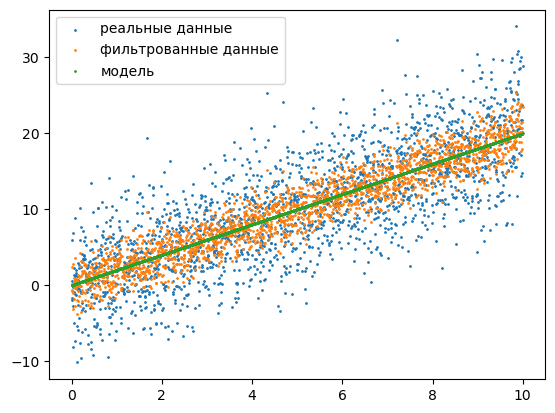

In [918]:
plt.scatter(time, u2, s = 1, label='реальные данные')
plt.scatter(time, x2, s = 1, label='фильтрованные данные')
plt.scatter(time, x1, s=1, label = 'модель')
plt.legend()